In [2]:
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ipaddress import ip_address,ip_network
# read dataset
ecommerce=pd.read_csv('/kaggle/input/ecommerce-purchases/Ecommerce Purchases')

This is a comprehensive case study leveraging the Amazon e-commerce purchase dataset to enhance the company's marketing strategies.

Here are some potential questions the marketing team might want answered:

1. Demographic Insights:

* What are the primary job roles of our customers?
* How is the distribution of customers across different geographic regions?

2. Purchase Behavior:

* What is the average purchase price, and are there any notable trends?
* Are there specific times of the day when customers are more active in making purchases?

3. Device and Browser Preferences:

* What browsers are most commonly used by our customers?
* Are there any patterns in device usage (e.g., mobile vs. desktop)?

4. Customer Engagement:

* How engaged are customers based on their language preferences?
* What is the distribution of customer email domains?

5. Marketing Effectiveness:

* Can we identify any correlation between certain job roles and higher purchase amounts?
* Are there specific demographic groups that respond more positively to marketing campaigns?

6. Fraud Detection:

* Are there any unusual patterns in IP addresses that might indicate fraudulent activity?
* How can we enhance security measures to protect customers from potential fraud?

To get started, let us check the first 5 rows in the dataset


In [3]:
ecommerce.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


### Drop sensitive columns
The credit card information will not be needed and they are very sensitive information that should be dropped from the dataset. Only the credit card provider information might be relevant for this analysis.

In [5]:
ecommerce.drop(columns=['Credit Card','CC Exp Date','CC Security Code'],inplace=True)

In [6]:
ecommerce.head(2)

,Address,Lot,AM or PM,Browser Info,Company,CC Provider,Email,Job,IP Address,Language,Purchase Price,Is_Fraudulent
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,False
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,False


To ensure the columns have the correct data type, dtype is used to list out the data type for each column. From the  result below, almost the columns have the `object` type. Only the `purchase price` is a numerical column

In [7]:
ecommerce.dtypes

Address            object
Lot                object
AM or PM           object
Browser Info       object
Company            object
CC Provider        object
Email              object
Job                object
IP Address         object
Language           object
Purchase Price    float64
Is_Fraudulent        bool
dtype: object

### Missing columns
To check for missing values, I used the `isna` method to count the total number of null values in the dataset. The result shows that there is no null value in the dataset


In [11]:
ecommerce.isna().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

From the result below, there are 10,000 rows and 14 columns in the dataset

In [12]:
ecommerce.shape

(10000, 14)

In [15]:
ecommerce.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

## Demography insights
1. What are the primary job roles of the customers

In [13]:
# Get the total number of jobs in the dataset

ecommerce['Job']=ecommerce['Job'].str.strip()
len(ecommerce['Job'].unique())

623

### Categorizing the job column into industries
Since the Job column has a very high cardinality, showing over 600 unique job types, for easier analysis, a new column will be created to categorize each job type to 10-12 different industries

In [8]:
# segment the jobs into categories
# Define the dictionary that will hold category mappings
category_mapping = {
    'Science and Research': [
        'Scientist, product/process development', 'Drilling engineer', 'Forensic scientist', 
        'Development worker, community', 'Diagnostic radiographer', 'Surveyor, quantity', 
        'Scientist, research (life sciences)', 'Clinical research associate', 'Technical author', 
        'Radio broadcast assistant', 'Chemist, analytical', 'Technical sales engineer', 
        'Research scientist (maths)', 'Scientist, research (medical)', 'Scientist, marine',
        'Water quality scientist', 'Geophysical data processor', 'Research officer, trade union', 
        'Field trials officer', 'Scientist, research (physical sciences)', 'Scientist, biomedical', 
        'Research scientist (life sciences)', 'Research officer, government', 'Product/process development scientist',
        'Geoscientist', 'Biomedical scientist', 'Clinical scientist', 'Research scientist',
        'Laboratory technician', 'Scientist, water quality', 'Scientific laboratory technician',
        'Food technologist', 'Geochemist', 'Metallurgist',
        'Chemical engineer', 'Materials engineer', 'Soil scientist',
    ],
    'Engineering and Technology': [
        'Engineer, broadcasting (operations)', 'Mechanical engineer', 'Engineer, agricultural',
        'Engineer, civil (consulting)', 'Engineer, materials', 'Engineer, aeronautical', 
        'Engineer, land', 'Engineer, water', 'Mining engineer', 'Site engineer',
        'Engineer, chemical', 'Civil engineer, contracting', 'Engineer, building services', 
        'Energy engineer', 'Civil Service engineer', 'Engineer, energy', 
    ],
    'Healthcare and Medical': [
        'Doctor, general practice', 'Medical laboratory scientific officer', 'Radiographer, diagnostic', 
        'Radiographer, therapeutic', 'Optometrist', 'Ophthalmologist', 'Dentist', 'Surgeon',
        'Psychotherapist', 'Physiotherapist', 'Paediatric nurse', 'Psychiatric nurse', 
        'Medical secretary', 'Nurse, adult', 'Hospital pharmacist', 'Community pharmacist',
        'Psychiatrist', 'Nurse, mental health', 'Health service manager', 'Clinical psychologist', 
        'Exercise physiologist', 'Medical physicist', 'Paramedic', 'Midwife',

    ],
    'Business and Finance': [
        'Financial manager', 'Accountant, chartered public finance', 'Financial adviser', 
        'Tax inspector', 'Purchasing manager', 'Corporate treasurer', 'Chartered certified accountant', 
        'Financial planner', 'Financial controller', 'Accountant, chartered', 
        'Chartered public finance accountant', 'Financial trader', 'Buyer, industrial', 
        'Buyer, retail', 'Retail banker', 'Insurance risk surveyor', 'Insurance underwriter', 
        'Insurance account manager', 'Pension scheme manager', 'Pensions consultant',
        'Retail merchandiser', 'Sales executive', 'Sales professional, IT', 

    ],
    'Creative Arts and Entertainment': [
        'Fine artist', 'Dancer', 'Photographer', 'Designer, jewellery', 'Musician', 'Artist', 
        'Graphic designer', 'Interior and spatial designer', 'Fashion designer', 'Set designer', 
        'Animator', 'Illustrator', 'Film/video editor', 'Video editor', 'Web designer', 
        'Designer, television/film set', 'Producer, television/film/video', 'Art gallery manager',
    ],
    'Education and Training': [
        'Lecturer, further education', 'Teacher, special educational needs', 
        'Secondary school teacher', 'Teacher, primary school', 'Higher education lecturer', 
        'Special educational needs teacher', 'Teacher, music', 'Private music teacher', 
        'Teacher, adult education', 'Teaching laboratory technician', 
        'Teacher, English as a foreign language', 'Education administrator',
        'Education officer, community', 'Education officer, environmental',
        'Education officer, museum',
    ],
    'Information Technology': [
        'Data processing manager', 'Systems analyst', 'IT technical support officer', 
        'Database administrator', 'Software engineer', 'Programmer, applications', 
        'IT consultant', 'IT sales professional', 'Technical author'],
    
     'Legal and Law Enforcement': [
        'Solicitor', 'Barrister', 'Legal secretary', 'Paralegal', 'Licensed conveyancer',
        'Chartered legal executive (England and Wales)', 'Magistrate', 'Police officer',
        'Probation officer', 'Legal executive',
    ],
    'Hospitality and Leisure': [
        'Travel agency manager', 'Tourist information centre manager', 'Hotel manager',
        'Restaurant manager', 'Cabin crew', 'Event organiser', 'Theatre manager',
        'Theme park manager', 'Fitness centre manager', 'Catering manager',
        'Public house manager', 'Fast food restaurant manager', 'Leisure centre manager',
    ],
    'Retail and Sales': [
        'Retail manager', 'Sales executive', 'Retail merchandiser', 'Merchandiser, retail',
        'Estate agent', 'Visual merchandiser', 'Car salesperson',
    ],
    'Construction and Trades': [
        'Civil engineer, consulting', 'Surveyor, building', 'Quantity surveyor',
        'Building surveyor', 'Surveyor, quantity', 'Civil engineer, contracting',
        'Architect', 'Carpenter', 'Electrician', 'Plumber',
        'Construction manager', 'Building services engineer',
    ],
}


In [9]:
# map the new categories to a new column called industry
ecommerce['Industry'] = ecommerce['Job'].apply(lambda x: next((key for key, value in category_mapping.items() if x.lower() in map(str.lower, value)), 'Other'))

In [10]:
# create a function that assigns categories based on keywords
def categorize_jobs(keywords): 
    # Categorize jobs based on keywords
    for category, keywords in keywords.items():
        for keyword in keywords:
            ecommerce.loc[ecommerce['Job'].str.contains(keyword, case=False), 'Industry'] = category
    

In [11]:
categories_keywords = {
    'Science and Research': ['scientist', 'researcher', 'laboratory', 'experiment', 'analysis','research','environmental','biology','biochemist','Horticulturist', 'Agriculture', 'Botanist', 'Plant', 'Cultivation'],
    'Business and Finance': ['business', 'finance', 'accountant', 'analyst', 'manager'],
    'Healthcare and Medical': ['healthcare', 'medical', 'doctor', 'nurse', 'therapist','clinic','clinical','health','psychologist'],
    'Creative Arts and Entertainment': ['artist', 'entertainment', 'musician', 'designer', 'creative','journalist','writer','author'],
    'Engineering and Technology': ['engineer', 'technology', 'developer', 'innovation', 'coding'],
    'Education and Training': ['education', 'training', 'teacher', 'instructor', 'educator','lecturer'],
    'Hospitality and Leisure': ['hospitality', 'leisure', 'hotel', 'tourism', 'restaurant','travel'],
    'Legal and Law Enforcement': ['legal', 'law enforcement', 'lawyer', 'police', 'justice'],
    'Information Technology': ['it', 'technology', 'developer', 'programmer', 'software','cyber','cyber security'],
    'Construction and Trades': ['construction', 'trades', 'builder', 'contractor', 'electrician','Surveyor'],
    'Retail and Sales': ['retail', 'sales', 'customer', 'merchandiser', 'store'],
    "Business and Finance":['Finance', 'Business', 'Manager', 'Analyst', 'Investment', 'Banking','Accountant', 'Financial', 'Consultant', 'Economics', 'Strategy','Entrepreneur', 'Corporate', 'Market', 'Sales', 'Risk', 'Management','Portfolio', 'Administration', 'Executive'
]
}
categorize_jobs(categories_keywords)

In [12]:
ecommerce['Industry'].value_counts()

Industry
Other                              2801
Information Technology             1310
Healthcare and Medical             1197
Business and Finance               1097
Engineering and Technology          899
Creative Arts and Entertainment     664
Science and Research                641
Education and Training              482
Construction and Trades             350
Retail and Sales                    278
Hospitality and Leisure             147
Legal and Law Enforcement           134
Name: count, dtype: int64

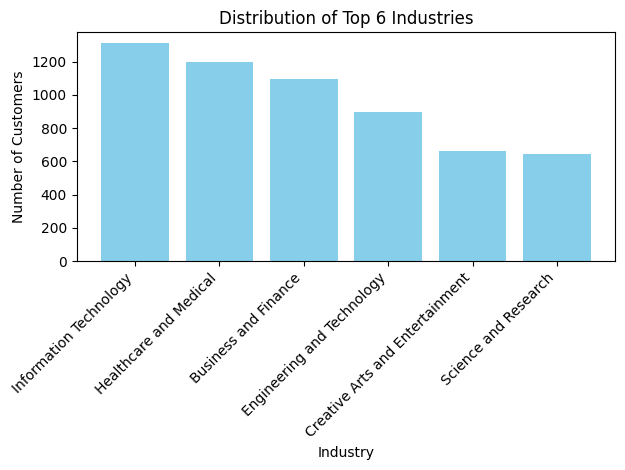

In [13]:
# Get the top 6 industries and filter out 'other' category
top_industries = ecommerce.Industry[ecommerce['Industry']!='Other'].value_counts().nlargest(6)

# Plot bar chart
plt.bar(top_industries.index, top_industries.values, color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Number of Customers')
plt.title('Distribution of Top 6 Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Total purchase price by job
job_by_price= ecommerce.groupby('Industry')['Purchase Price'].sum().sort_values(ascending=False)
job_by_price=job_by_price[job_by_price.index  !='Other']
job_by_price

Industry
Information Technology             65547.76
Healthcare and Medical             62102.68
Business and Finance               53989.01
Engineering and Technology         44620.67
Creative Arts and Entertainment    33363.08
Science and Research               32215.83
Education and Training             23878.90
Construction and Trades            17888.43
Retail and Sales                   13491.56
Hospitality and Leisure             7273.58
Legal and Law Enforcement           6905.30
Name: Purchase Price, dtype: float64

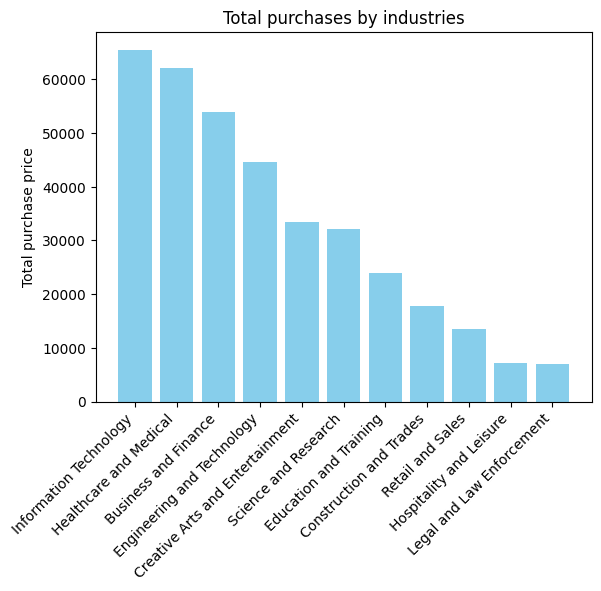

In [15]:
plt.bar(job_by_price.index,job_by_price.values,color='skyblue')
plt.title('Total purchases by industries')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total purchase price')
plt.show()

Seeing as the largest customer base are people in information tech and healthcare, it is not surprising that they have the highest total purchase price. On average, however, the purchase price is relatively similar across all industries.

In [16]:
average_job_by_price= ecommerce.groupby('Industry')['Purchase Price'].mean().sort_values(ascending=False)
average_job_by_price=average_job_by_price[average_job_by_price.index  !='Other']
average_job_by_price

Industry
Healthcare and Medical             51.881938
Legal and Law Enforcement          51.532090
Construction and Trades            51.109800
Science and Research               50.258705
Creative Arts and Entertainment    50.245602
Information Technology             50.036458
Engineering and Technology         49.633671
Education and Training             49.541286
Hospitality and Leisure            49.480136
Business and Finance               49.215141
Retail and Sales                   48.530791
Name: Purchase Price, dtype: float64

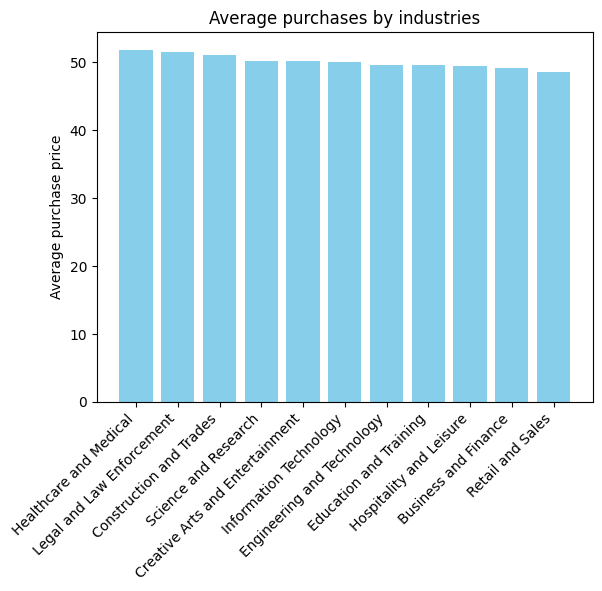

In [17]:
plt.bar(average_job_by_price.index,average_job_by_price.values,color='skyblue')
plt.title('Average purchases by industries')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average purchase price')
plt.show()

In [18]:
# Purchases by time of the day
purchase_by_time=ecommerce.groupby('AM or PM')['Purchase Price'].sum()
purchase_by_time

AM or PM
AM    247519.87
PM    255953.15
Name: Purchase Price, dtype: float64

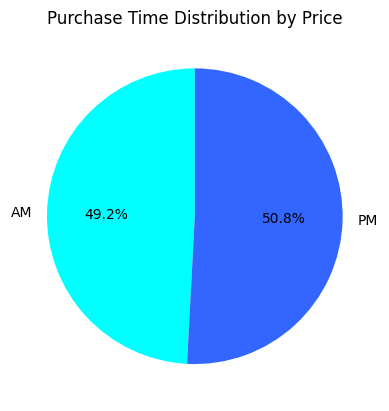

In [19]:
colors = ['#00FFFF', '#3366FF']
plt.pie(purchase_by_time, labels=purchase_by_time.index, autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Purchase Time Distribution by Price')
plt.show()

The price difference between morning and evening is too close to show any interesting trend. 

## Customer language distribution


In [20]:
# what are the different languages of the customers?
ecommerce['Language'].value_counts()

Language
de    1155
ru    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: count, dtype: int64

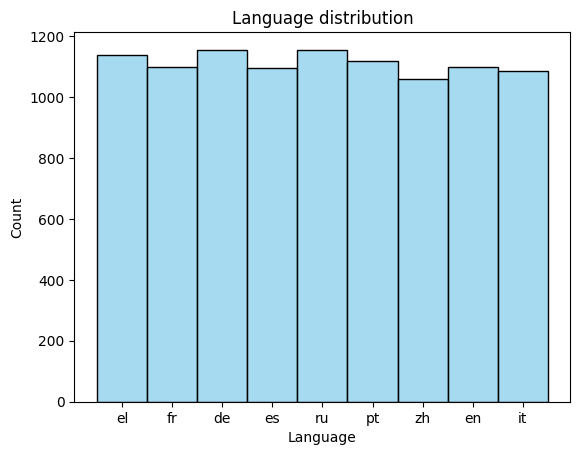

In [21]:
sns.histplot(data=ecommerce, x='Language', color='skyblue', discrete=True)
plt.title('Language distribution')
plt.show()

# distribution of email domains

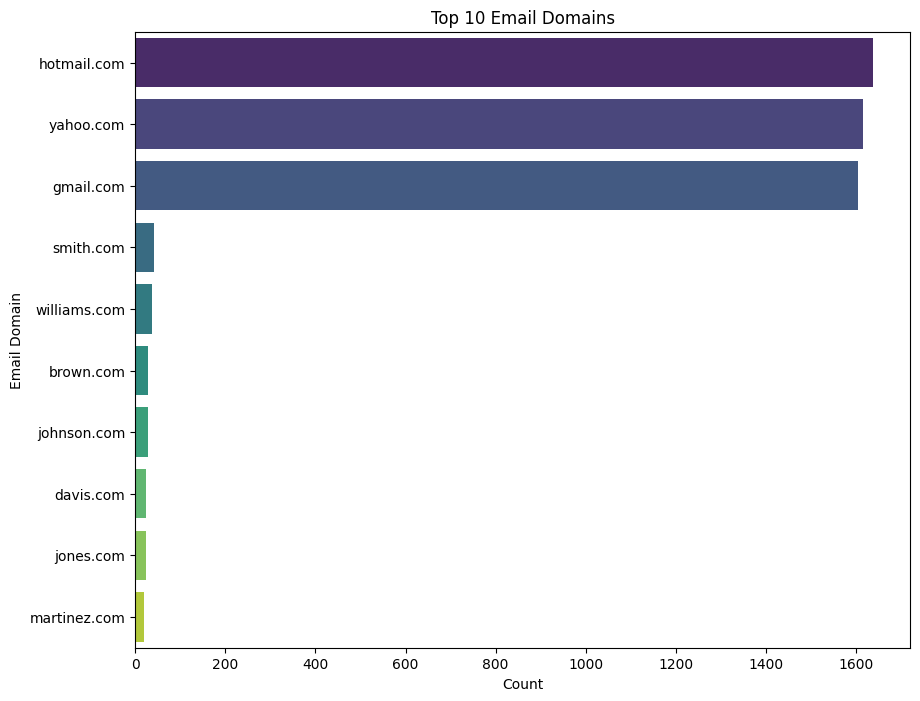

In [22]:
ecommerce['email_domain'] = ecommerce['Email'].apply(lambda x: x.split('@')[1] if '@' in x else None)
top_10_email= ecommerce['email_domain'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_email.values, y=top_10_email.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Email Domain')
plt.title('Top 10 Email Domains')
plt.show()

## Credit card provider distribution

In [23]:
credit_card_count=ecommerce['CC Provider'].value_counts()

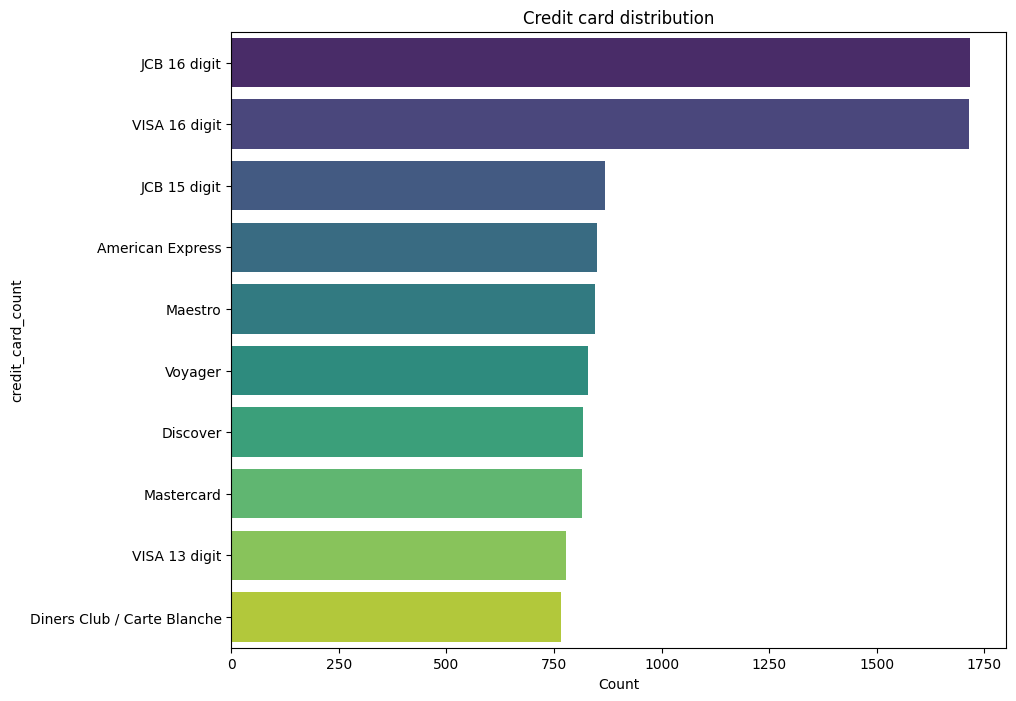

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(x=credit_card_count.values, y=credit_card_count.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('credit_card_count')
plt.title('Credit card distribution')
plt.show()

In [25]:
# Average purchase by credit card
purchase_by_credit_card= ecommerce.groupby('CC Provider')['Purchase Price'].mean().sort_values(ascending=False)
purchase_by_credit_card

CC Provider
Voyager                        51.973185
Discover                       51.662338
VISA 13 digit                  51.449858
JCB 15 digit                   51.125115
American Express               50.489423
Maestro                        50.379173
Mastercard                     50.043015
VISA 16 digit                  49.871055
JCB 16 digit                   49.299143
Diners Club / Carte Blanche    48.733233
Name: Purchase Price, dtype: float64

The average credit card by purchase looks evenly distributed.

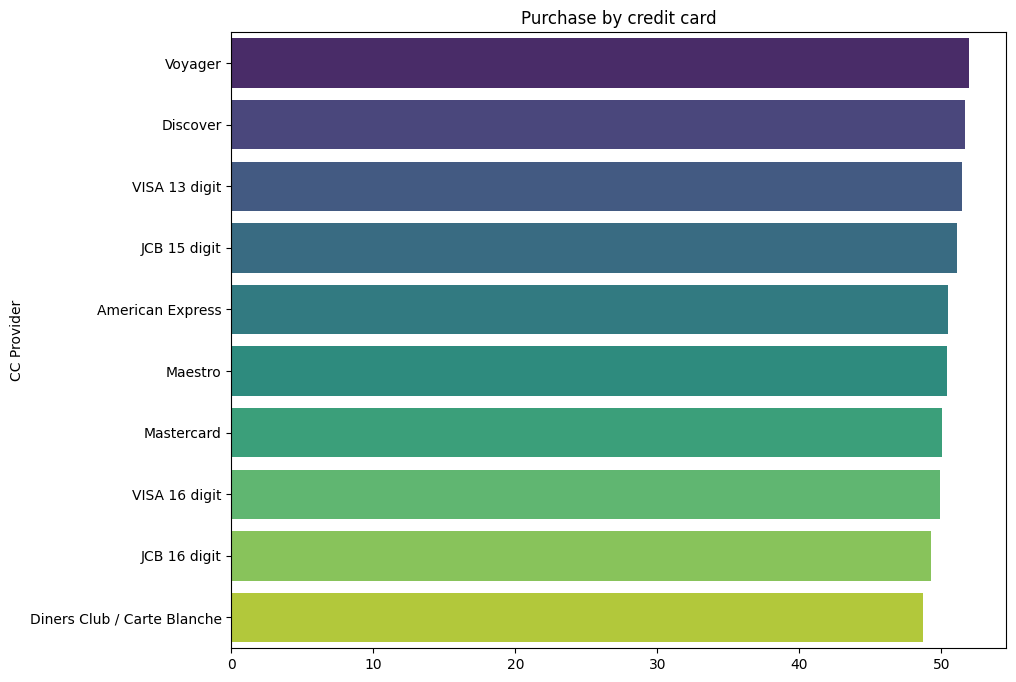

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(x=purchase_by_credit_card.values,y=purchase_by_credit_card.index,palette='viridis')
plt.title('Purchase by credit card')
plt.show()

## Browser type distribution

In [27]:
browser_names = ['Chrome', 'Firefox', 'Safari', 'Edge', 'IE', 'Opera']

ecommerce['Browser'] = ecommerce['Browser Info'].apply(lambda x: next((name for name in browser_names if name.lower() in x.lower()), 'Other')).sort_values(ascending=False)
ecommerce['Browser'].value_counts()

Browser
Opera      2076
IE         2052
Chrome     1984
Firefox    1973
Safari     1915
Name: count, dtype: int64

In [28]:
# purchase by browser
ecommerce.groupby('Browser')['Purchase Price'].median().sort_values()

Browser
Safari     48.600
Firefox    49.380
Opera      51.065
IE         51.500
Chrome     51.655
Name: Purchase Price, dtype: float64

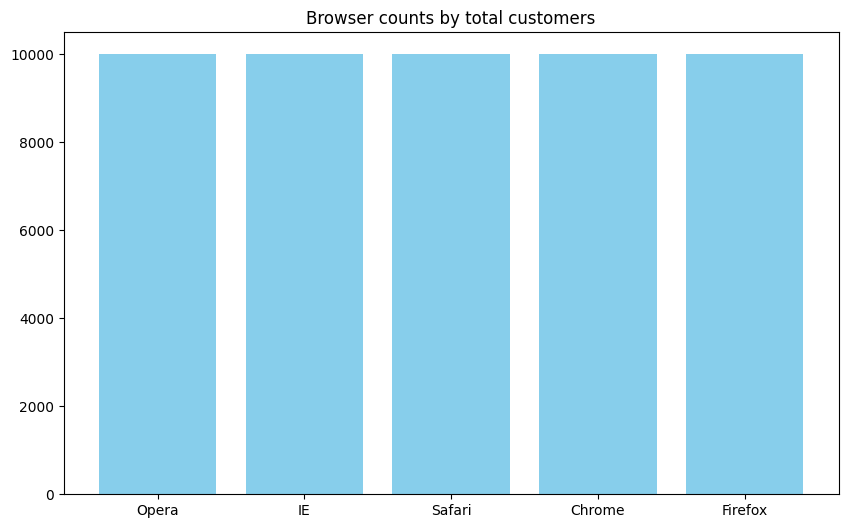

In [30]:
# browser chart
plt.figure(figsize=(10,6))
plt.bar(ecommerce['Browser'].values,ecommerce['Browser'].index, color='skyblue')
plt.title('Browser counts by total customers')
plt.show()

## IP Address Analysis

The IP address library is employed to find potentially fraudulent addresses identified on the [Scamalytics website](https://scamalytics.com/ip).

In [4]:
# Create a new column 'Is_Fraudulent' based on IP address patterns
fraudulent_ip_networks = [
    '37.88.103.103','37.186.162.162','134.8.210.210','134.10.64.64','125.157.172.172',
    '129.120.236.236','182.164.210.210','73.252.123.123','144.214.156.156','78.136.38.38',
    '79.156.158.158','192.13.227.227','99.17.211.211','110.243.42.42','6.131.155.155',
    '26.205.38.38','244.190.82.82','247.40.116.116','247.41.156.156','247.41.239.239','92.68.114.114','3.104.205.205','10.246.74.74','12.12.212.212','26.124.116.116','110.88.110.110','208.199.224.224','240.14.137.137','240.54.217.217','202.40.48.48','212.71.51.51','27.57.51.51',
    '234.129.51.51','175.78.132.132','194.218.72.72','245.139.242.242','155.20.40.40','199.29.10.10','162.199.190.190',
    '61.152.44.44','61.152.62.62','61.158.85.85','159.91.38.38','101.209.16.16','192.218.80.80',
    '210.53.109.109','210.53.227.227','37.88.103.103','210.53.91.91','201.194.206.206','66.199.49.49',
    '210.53.161.161','115.142.175.175','139.153.202.202','249.73.170.170','6.239.72.72','89.34.35.35','89.34.38.38','89.34.49.49','89.34.250.250','28.68.114.114',
    '28.71.116.116','28.87.19.19','28.87.20.20','28.131.161.161','54.203.92.92','54.216.74.74','54.248.83.83','199.47.196.196',
    '70.63.109.109','199.29.10.10','247.74.204.204','249.57.253.253','191.204.9.9','42.116.14.14',
    '42.116.17.17','42.116.18.18','42.116.19.19','42.116.22.22','42.116.25.25','42.116.27.27','119.160.109.109',
    '251.250.224.224','210.52.197.197','210.53.64.64','210.53.93.93','210.53.115.115','210.53.118.118',
    '210.53.122.122','210.54.20.20','210.54.89.89','210.78.91.91','210.79.96.96','210.84.179.179','210.84.216.216','210.85.53.53','210.85.63.63','249.230.88.88','91.234.36.36','222.82.134.134','210.85.104.104',
]

def fraud_networks (address_list):
    for address in address_list:
        address=ip_network(address)
        
fraud_networks(fraudulent_ip_networks)

def is_fraudulent(ip_address_str):
    try:
        ip = ip_address(ip_address_str)
        return any(ip == ip_address(fraudulent_ip) for fraudulent_ip in fraudulent_ip_networks)
    except ValueError:
        return False # Handle invalid IP addresses

# Create a new column 'Is_Fraudulent' based on IP address patterns
ecommerce['Is_Fraudulent'] = ecommerce['IP Address'].apply(is_fraudulent)

# Display rows with potential fraudulent activity
fraudulent_rows = ecommerce[ecommerce['Is_Fraudulent']]
print(fraudulent_rows)

Empty DataFrame
Columns: [Address, Lot, AM or PM, Browser Info, Company, Credit Card, CC Exp Date, CC Security Code, CC Provider, Email, Job, IP Address, Language, Purchase Price, Is_Fraudulent]
Index: []


The `is_fraudulent` column is empty, meaning no fraudulent ip address was found!!!